### Hidden Markov Model (HMM)

Hidden Markov Models (HMMs) have been widely applied in the stock market to forecast the price and volatility movements of stock market. In particular HMMs are helpful in forecasting the underlying regime changes that lead to the shifts in the means, variances, volatilities, serial correlation and covariances of asset returns.

This notebook contains two sub-sections. In the first sub-section I simulate a time series with two latent states: bearish (down) market and bullish (up) market. I demonstrate the hidden markov model method by apply to the simulation. The second sub-section pulls stock price data from the stock market and models it with a HMM. The R package "depmixS4", **Dep**endent **Mix**ture Models in **S4**, is used in this study. ("S4" is the Object-oriented (OO) system in R. For more information about S4, please click [here](http://adv-r.had.co.nz/S4.html).)

In [1]:
#install.packages('depmixS4')
#install.packages('quantmod')
#install.packages("Metrics")
library('depmixS4')
library('quantmod')
set.seed(1)

Loading required package: nnet
Loading required package: MASS
Loading required package: Rsolnp
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


### A simulated stock returns time series

Assume the stock returns follow a Gaussian distribution. The means and standard deviations of the two underlying distributions are the following:

In [2]:
# bear market returns distributions
bear_mean <- -0.05
bear_var <- 0.2

# bear market returns distributions
bull_mean <- 0.1
bull_var <- 0.1

I am going to simulate a stock returns time series that come from four alternating regimes of different length of days. 

In [3]:
# Assume the lengths of days can vary from 30 days to 200 days.
days <- replicate(4, sample(30:200, 1))

# Create the various bull and bear markets returns
market_bull_1 <- rnorm( days[1], bull_mean, bull_var )
market_bear_2 <- rnorm( days[2], bear_mean, bear_var )
market_bull_3 <- rnorm( days[3], bull_mean, bull_var )
market_bear_4 <- rnorm( days[4], bear_mean, bear_var )

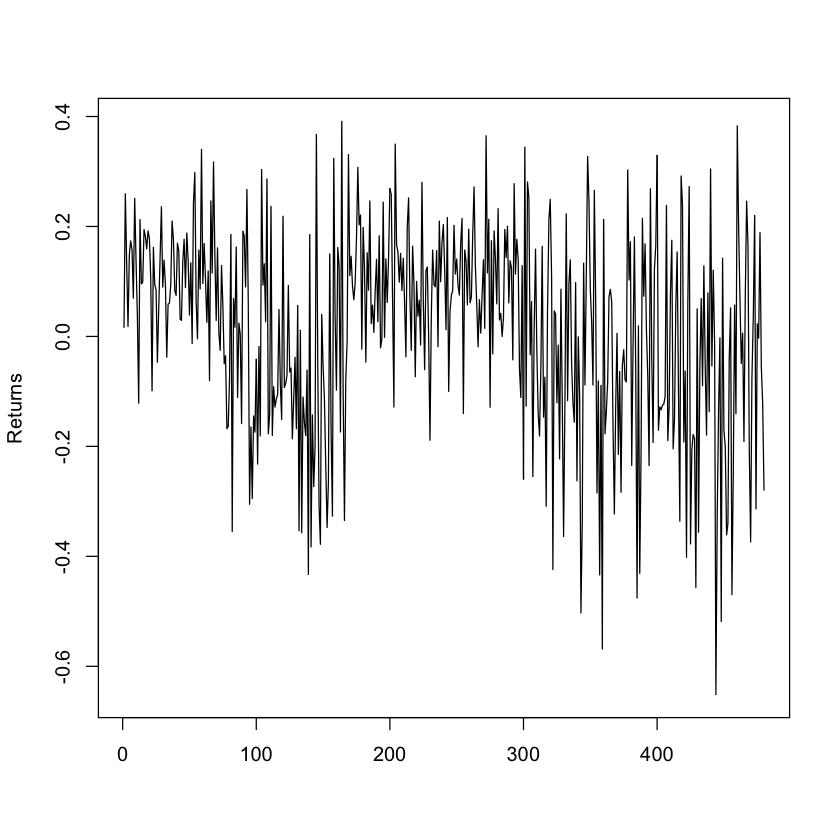

In [6]:
# Create the list of true regime states and full returns list
regime_index <- c( rep(1,days[1]), rep(2,days[2]), rep(1,days[3]), rep(2,days[4]))
stock_rtns <- c( market_bull_1, market_bear_2, market_bull_3, market_bear_4)
plot(stock_rtns, type="l", xlab='', ylab="Returns")

In [7]:
# Specify the model
hmm <- depmix(data=data.frame(stock_rtns), 
              stock_rtns ~ 1, 
              family = gaussian(), 
              nstates = 2,
             )
# Fit the model by calling the "fit" function
hmmfit <- fit(hmm, verbose = FALSE)
hmmfit

converged at iteration 27 with logLik: 224.7568 


Convergence info: Log likelihood converged to within tol. (relative change) 
'log Lik.' 224.7568 (df=7)
AIC:  -435.5135 
BIC:  -406.297 

After the model is fit, we can get the posterior probabilities of the underlying regimes. We then compare with the true states. The following result shows the posterior probabilities of the two hidden states $(S1, S2)$ for all the days.

In [8]:
# plot posterior state sequence for the 2-state model
post_probs <- posterior(hmmfit)
head(post_probs)

state,S1,S2
2,0.000000000,1.0000000
2,0.004824024,0.9951760
2,0.003425227,0.9965748
2,0.007232853,0.9927671
2,0.003343977,0.9966560
2,0.003347321,0.9966527


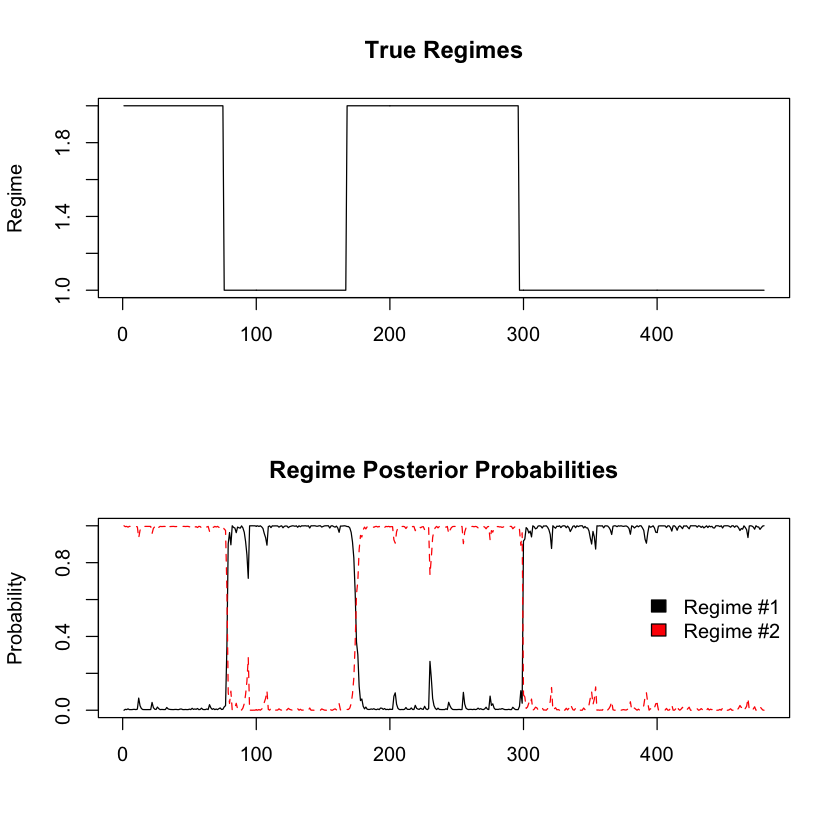

In [34]:
layout(1:2)
# Plot the true regimes
matplot(post_probs$state, type='l', main='True Regimes',xlab='', ylab='Regime')
# Plot the probabilities of the regimes
matplot(post_probs[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')
legend(x='right', c('Regime #1','Regime #2'), fill=1:2, bty='n')

### An actual stock returns time series

[1] "AAPL"

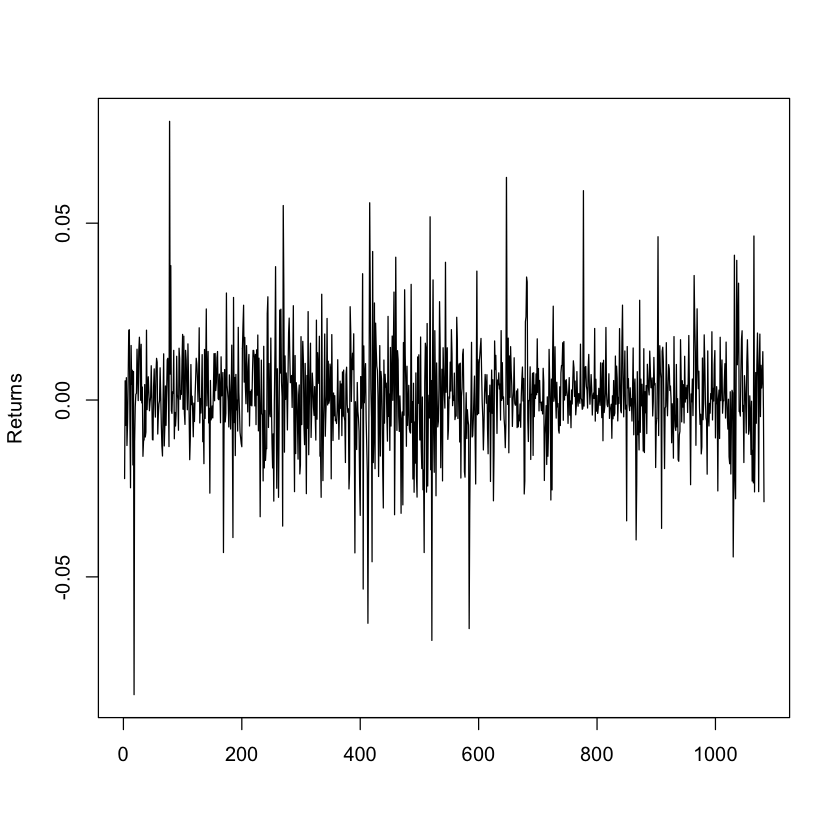

In [43]:
# Obtain AAPL data from 2001 onwards and
# create the returns stream from this
getSymbols( "AAPL", from="2014-01-01" )
Rtns = diff( log( Cl( AAPL ) ) )
Rtns = as.numeric(Rtns)
plot(Rtns, type="l", xlab='', ylab="Returns")

converged at iteration 72 with logLik: 3151.533 


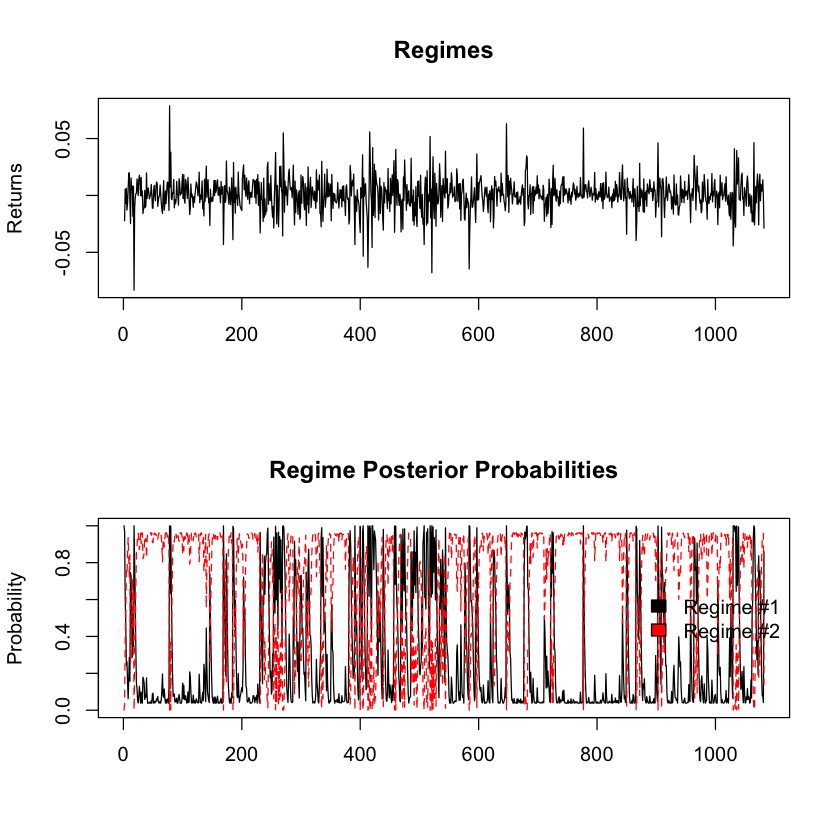

In [45]:
stock_hmm <- depmix(data=data.frame(Rtns), 
                Rtns ~ 1, 
                family = gaussian(), 
                nstates = 2,
             )
stock_hmmfit <- fit(stock_hmm, verbose = FALSE)
post_probs <- posterior(stock_hmmfit)

# Plot 
layout(1:2)
plot(Rtns, type='l', main='Regimes', xlab='', ylab='Returns')
matplot(post_probs[,-1], type='l', main='Regime Posterior Probabilities', ylab='Probability')
legend(x='right', c('Regime #1','Regime #2'), fill=1:2, bty='n')

Readers are also recommended to check the [idhmm](https://cran.r-project.org/web/packages/ldhmm/vignettes/ldhmm-spx.pdf) package, which was developed specifically for the stock market.